In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
d2=pd.read_csv('customers_data.csv')
d2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
d2.shape

(440, 8)

In [4]:
#there are 440 rows and 8 columns
#channel refers type of customer, ie,hotel,restaurant,cafe and retailers
#region shows the area
#fresh - annual spending on fresh products
#milk-annual spending on milk products
#grocery-annual spending on groceries
#frozen-annual spending on frozen food items
#detergents_paper- annual spending on detergents and paper products
#delicassen-annual spending on delicatessen products


In [5]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#region is not relevant for our analysis,so lets drop that column
d2.drop('Region',axis=1,inplace=True)

In [7]:
d2.nunique()

Channel               2
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [8]:
d2.isnull().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
#there are no null values present

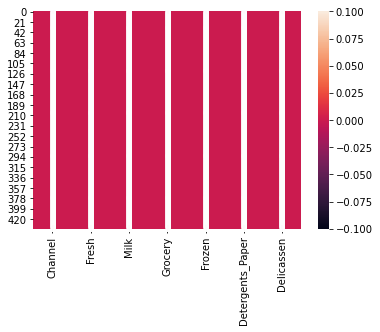

In [10]:
sns.heatmap(d2.isnull(),annot=True)

In [11]:
d2.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [12]:
#the data shows greta differrence between mean and medium for all attributes
#difference between 75% and maximum is also greater for all the attributes,so there might be chances for the presence of outliers

In [13]:
d2cor=d2.corr()
d2cor

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Fresh,-0.169172,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


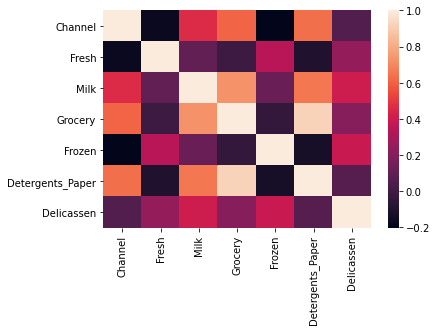

In [14]:
sns.heatmap(d2cor)

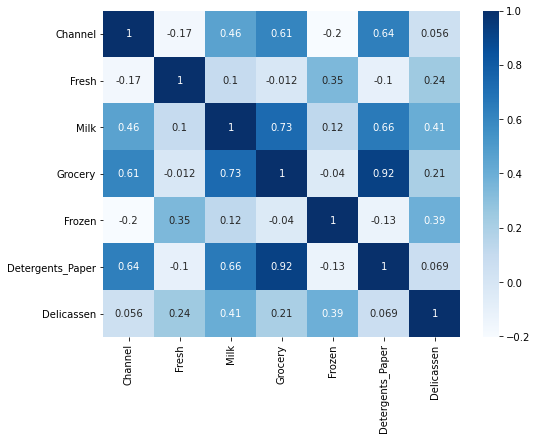

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(d2cor,cmap='Blues',annot=True)

In [38]:
d2.drop('Channel',axis=1,inplace=True)

In [39]:
collist=d2.columns.values
ncol=7
nrows=8

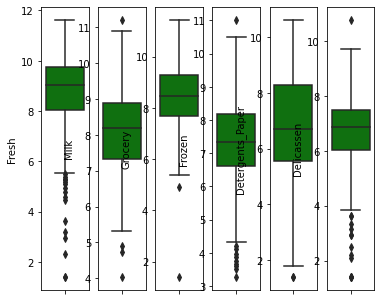

In [40]:
plt.figure(figsize=(ncol,7*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d2[collist[i]],color='green',orient='v')

In [41]:
d2.skew()

Fresh              -1.575326
Milk               -0.224063
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Delicassen         -1.091827
dtype: float64

In [42]:
for col in d2.columns:
    if d2.skew().loc[col]>0.55:
        d2[col]=np.log1p(d2[col])

In [43]:
d2.skew()

Fresh              -1.575326
Milk               -0.224063
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Delicassen         -1.091827
dtype: float64

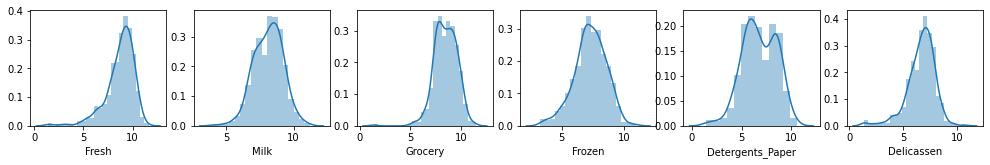

In [44]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d2[collist[i]])

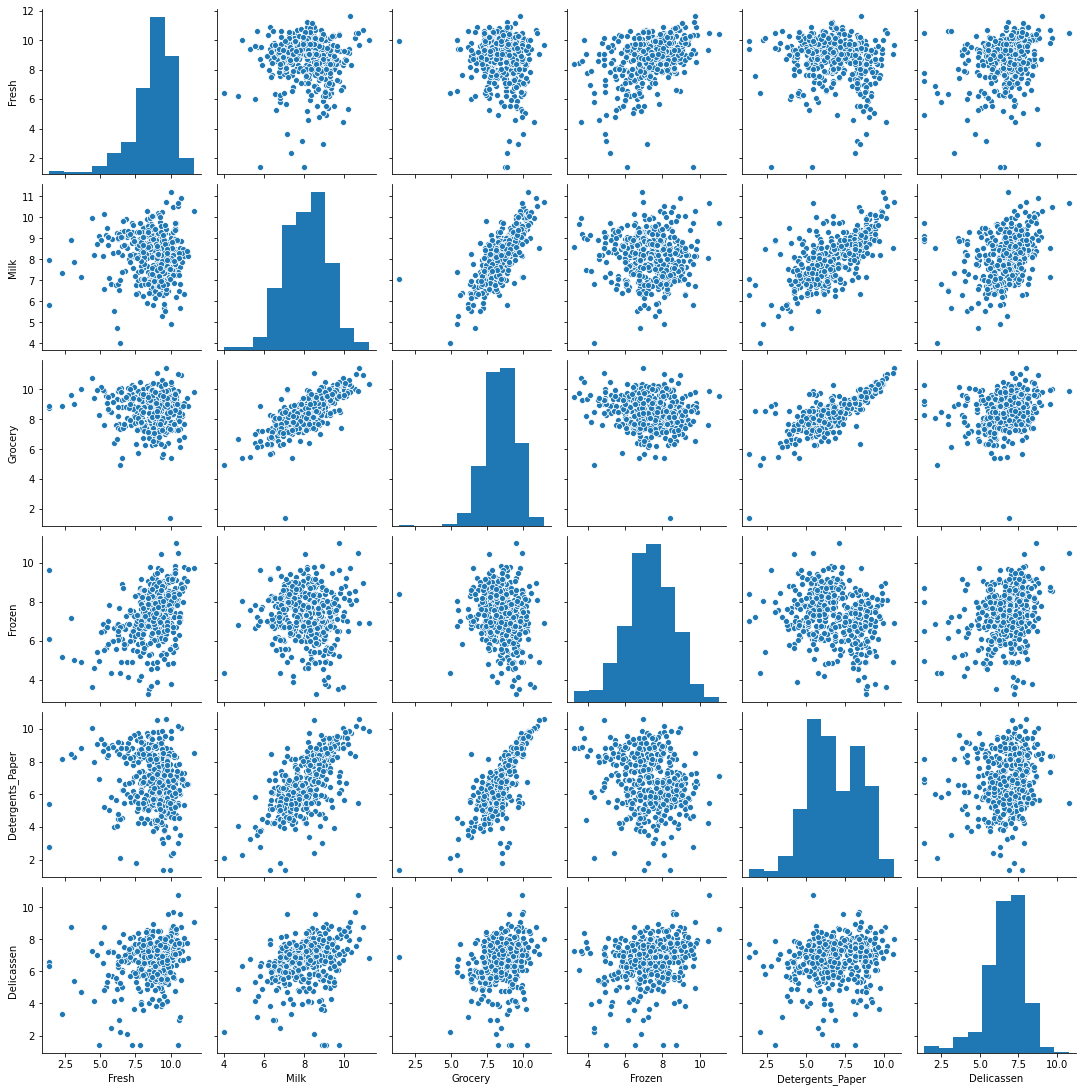

In [45]:
sns.pairplot(d2)

In [46]:
#milk have a positive linear relation with grocery ,that means customers who buy more milk and milk products also buys grocery items more.
#grocery have a positive linear relation with detergents and paper items.
#grocery have a negative leap with frozen ,that means customers who buys groceries opt less for frozen food items

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(d2))
print(d2.shape)
d2.new=d2[(z<3).all(axis=1)]
print(d2.new.shape)

(440, 6)
(422, 6)


In [48]:
#18 rows are deleted due to presence of outliers

In [55]:
y=d2.new.iloc[:,:]
y.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


In [65]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
KModel=kmeans.fit(d2.new)

In [66]:
KModel.labels_

array([0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 3, 1, 0, 0, 0, 2,
       1, 0, 0, 3, 2, 2, 0, 1, 0, 1, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 1, 0, 0, 3, 2, 3, 3, 0, 0, 0, 1, 3,
       0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 3, 2, 3, 0, 1, 0, 0, 0, 1, 2, 1,
       2, 1, 0, 1, 3, 2, 2, 0, 0, 0, 1, 1, 2, 3, 0, 3, 2, 0, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 3, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 1, 0, 3, 3, 2, 0,
       0, 0, 0, 3, 2, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 1, 0, 0, 3, 2, 2, 0,
       3, 2, 2, 2, 3, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 3, 0, 3, 2, 2, 2, 3, 2, 1, 2, 2, 0, 2, 2, 1, 1, 3, 2, 1,
       3, 2, 2, 2, 1, 1, 1, 1, 0, 0, 3, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 3, 1, 3, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 3, 1, 0, 0, 2, 0,
       0, 3, 3, 3, 3, 0, 2, 2, 3, 1, 2, 3, 2, 1, 3,

In [67]:
KModel.cluster_centers_

array([[9.14974715, 9.04704902, 9.43763137, 7.2984262 , 8.48719755,
        7.36272077],
       [9.62067589, 7.98515808, 8.18827521, 8.58652781, 6.29240705,
        7.25931402],
       [8.76674474, 7.31660933, 7.5631782 , 7.0932535 , 5.35661144,
        6.18451785],
       [7.23436738, 8.82396258, 9.36131222, 5.90956083, 8.49721217,
        6.24533103]])

In [68]:
import pandas as pd
pd.crosstab(d2.new,KModel.labels_)

ValueError: Shape of passed values is (6, 2), indices imply (422, 2)